# **1. Perkenalan Dataset**

This dataset was created to simulate realistic sales patterns in the beverage industry, highlighting important factors like regional preferences, seasonal fluctuations, and customer segmentation. It features both Business-to-Business (B2B) and Business-to-Consumer (B2C) transactions, making it adaptable for a variety of analytical purposes.
- Order_ID Unique identifier for each order. Groups multiple products within the same order.
- Customer_ID Unique identifier for each customer, distinguishing individual buyers.
- Customer_Type Indicates whether the customer is B2B (business-to-business) or B2C (business-to-consumer).
- Product The name of the product purchased, such as "Coca-Cola" or "Erdinger Weißbier".
- Category The product category, such as "Soft Drinks" or "Alcoholic Beverages".
- Unit_Price The price per unit of the product.
- Quantity The number of units purchased for the specified product in the order.
- Discount The discount applied to the product (e.g., 0.1 for 10%). Discounts are only given to B2B customers.
- Total_Price The total price for the product after applying discounts.
- RegionThe region of the customer, such as "Bayern" or "Berlin".
- Order_Date The date when the order was placed.

# **2. Import Library**

- mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.
- emuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.
- Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
import pandas as pd
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # untuk joblib mendeteksi core fisik

import seaborn as sns # eksplorasi visualisasi
import matplotlib.pyplot as plt # eksplorasi visualisasi

# Preprocessing
import numpy as np # untuk log1p
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler, MinMaxScaler # Preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering # Model

from sklearn.metrics import silhouette_score # Evaluasi Model [target > 0.7 dengan min 5 fitur (numerik, kategori)]

# Feature Selection
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier # Cek Feature Importance dari Random Forest (tidak menggunakan RFE karena tidak menampilkan persentase importance nya)

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('beverage_sales_data_10k.csv') # adalah 10.000 rows sample random dari dataset asli yang ada di kaggle (900k rows x 11 columns) 
df.head(20)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16
5,ORD1905015,CUS7810,B2B,Riesling,Alcoholic Beverages,8.62,47,0.05,384.88,Bayern,2021-02-27
6,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,1.74,5,0.00,8.70,Niedersachsen,2023-08-13
7,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,1.80,15,0.00,27.00,Saarland,2022-10-06
8,ORD1747192,CUS7549,B2B,Havana Club,Alcoholic Beverages,30.22,57,0.10,1550.29,Bayern,2023-03-16
9,ORD1669739,CUS3794,B2B,Vio Wasser,Water,0.98,6,0.05,5.59,Niedersachsen,2021-09-20


# **4. Exploratory Data Analysis (EDA)**
- **Memahami Struktur Data** (Jumlah baris dan kolom, Jenis data (numerikal atau kategorikal))
- **Menangani Data yang Hilang**  (Pengisian atau penghapusan)
- **Analisis Distribusi dan Korelasi** (Analisis Distribusi (statistika deskripfit, histogram, boxplot), hubungan variabel (matriks korelasi atau scatter plot))
- **Visualisasi Data** (grafik distribusi & diagram batang untuk variabel kategorikal, Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel)

## 4.1. Data Structure, Duplicate & Missing Value

In [3]:
print(f"DF: {df.shape[0]} rows x {df.shape[1]} columns")
display(df.info()) # tipe data sesuai (object bisa diubah ke category)
display(df.head())
display(df.describe().T) # nilai right skewed

print(df.duplicated().sum()) # no duplicate
print(df.isna().sum()) # no missing value

DF: 10000 rows x 11 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.5+ KB


None

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


,count,mean,std,min,25%,50%,75%,max
Unit_Price,10000.0,5.876568,15.093122,0.33,1.05,1.75,3.1900,138.72
Quantity,10000.0,22.787500,26.569801,1.00,6.00,11.00,29.0000,100.00
Discount,10000.0,0.029495,0.044710,0.00,0.00,0.00,0.0500,0.15
Total_Price,10000.0,135.385663,528.922868,0.35,8.30,20.70,67.8425,10111.96


0
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


## 4.2. Category Variance & Count

In [4]:
cols = df.select_dtypes(exclude=['int64','float64']).columns
for col in cols:
    print(f"Len {col}: {len(df[col].unique().tolist())}") # unique values
    print(f"{col}: {df[col].unique().tolist()}\n")

Len Order_ID: 9994
Order_ID: ['ORD1663596', 'ORD1999010', 'ORD347756', 'ORD600360', 'ORD2300591', 'ORD1905015', 'ORD2638652', 'ORD803183', 'ORD1747192', 'ORD1669739', 'ORD7309', 'ORD1335063', 'ORD1027922', 'ORD1271103', 'ORD2464854', 'ORD2267500', 'ORD2805233', 'ORD2842493', 'ORD176500', 'ORD1143329', 'ORD2848930', 'ORD1807814', 'ORD1191549', 'ORD277724', 'ORD465844', 'ORD641791', 'ORD2342999', 'ORD760208', 'ORD1958004', 'ORD2739791', 'ORD2748943', 'ORD925607', 'ORD303869', 'ORD941678', 'ORD28261', 'ORD909319', 'ORD2873933', 'ORD956181', 'ORD990049', 'ORD140621', 'ORD797615', 'ORD44574', 'ORD954366', 'ORD1838793', 'ORD2179028', 'ORD1685779', 'ORD1889368', 'ORD947422', 'ORD2111882', 'ORD1324132', 'ORD1208029', 'ORD57899', 'ORD927220', 'ORD1104071', 'ORD2291655', 'ORD863071', 'ORD2540676', 'ORD2704617', 'ORD1920379', 'ORD2941370', 'ORD1641649', 'ORD2929028', 'ORD1339838', 'ORD2197012', 'ORD1950753', 'ORD304660', 'ORD437227', 'ORD1884831', 'ORD353623', 'ORD1461278', 'ORD2933592', 'ORD1924

## 4.3. Distribution, Outliers & Correlation

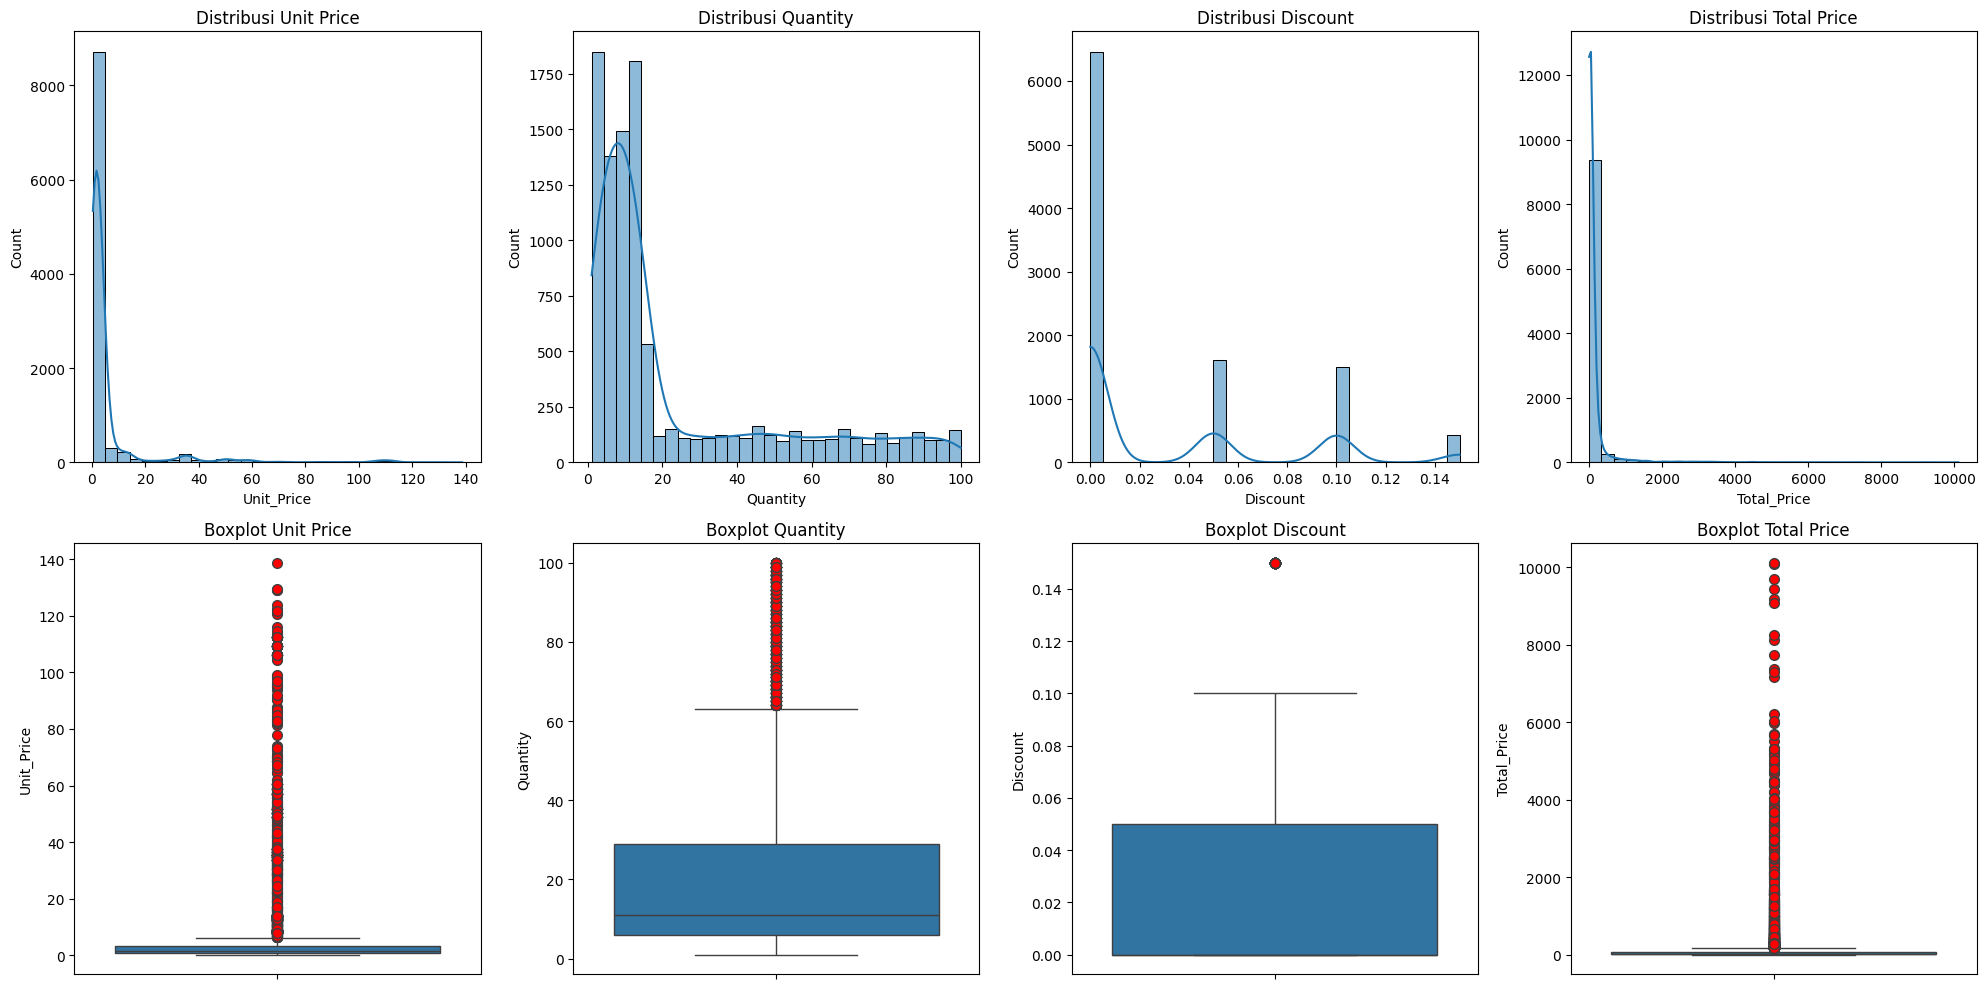

             Jumlah Outlier  Persentase Outlier (%)
Unit_Price             1208                   12.08
Quantity               1264                   12.64
Discount                431                    4.31
Total_Price            1293                   12.93


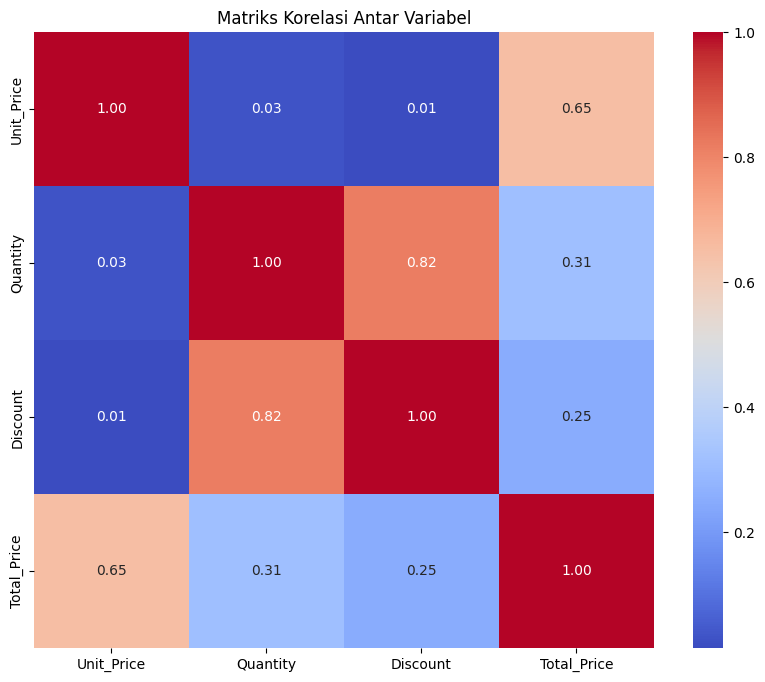

In [5]:
#--- DISTRIBUTION ---
# Buat figure dan axis dengan 2 baris (histogram & boxplot) & 4 kolom (jumlam kolom numerik)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Data numberic yang di plot, normalisasi & cleaning
dict_nums = {
    "Unit Price": df["Unit_Price"],
    "Quantity": df["Quantity"],
    "Discount": df["Discount"],
    "Total Price": df["Total_Price"]
}

# Looping untuk membuat histogram (Distribusi) di baris pertama & boxplot (Outliers) di baris kedua
for i, (label, data) in enumerate(dict_nums.items()):
    # Baris 1: Histogram (Distribusi Data)
    sns.histplot(data, bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Distribusi {label}")

    # Baris 2: Boxplot (Outliers)
    sns.boxplot(data=data, orient="v", ax=axes[1, i], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 7})
    axes[1, i].set_title(f"Boxplot {label}")

# Atur tata letak agar tidak bertumpuk
plt.tight_layout()
plt.show()

# Outlier Number & Percentage
test_df = df.select_dtypes(include=['float64', 'int64']).copy() # ambil kolom numerik

# Menghitung IQR untuk setiap kolom numerik
Q1 = test_df.quantile(0.25)
Q3 = test_df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier
outlier_counts = ((test_df < lower_bound) | (test_df > upper_bound)).sum()

# Menghitung persentase outlier
outlier_percentage = (outlier_counts / len(test_df)) * 100

# Menampilkan hasil
outlier_info = pd.DataFrame({'Jumlah Outlier': outlier_counts, 'Persentase Outlier (%)': outlier_percentage})
print(outlier_info)


#--- CORRELATION ---
# Menghitung Korelasi Kolom Numeriknya
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

**Insight:**
- Correlation:
  - Fitur Quantity dan Discount memiliki korelasi tinggi → Bisa dipertimbangkan untuk reduksi dimensi atau hanya memilih salah satu.
  - Unit Price dan Total Price masih cukup aman digunakan bersama, tetapi perlu diperhatikan saat scaling.
  - Jika ingin mengurangi redundansi (terutama pada Quantity-Discount), bisa lakukan PCA atau seleksi fitur.

# **5. Data Preprocessing**
- Menghapus atau Menangani Data Kosong (Missing Values) ❌ Tidak ada missing value
- Menghapus Data Duplikat ❌ tidak ada duplikasi data
- Hapus Fitur/Kolom tidak Bermakna ✅ (Kolom ID tidak menggambarkan pertimbangan tertentu)
- Deteksi dan Penanganan Outlier ⏩ (Jika Silhoute Score < 0.7 mungin diperlukan)
- Normalisasi atau Standarisasi Fitur ⏩ (Jika Silhoute Score < 0.7 mungin diperlukan)
- Encoding Data Kategorikal ✅(untuk uji dengan semua fitur)
- Binning (Pengelompokan Data) ❌ Tidak ada data ordinal yang bisa di binning kan

Dalam clustering, setiap data harus memiliki nilai numerik yang lengkap karena algoritma clustering seperti K-Means, Hierarchical Clustering, dan DBSCAN tidak bisa menangani missing values secara langsung. 

In [6]:
number_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price'] # digunakan unutk pemisah data numerik

## 5.1. Hapus Fitur/Kolom Tidak Bermakna

In [ ]:
df2 = df.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date']) # kolom ID (product_id & customer_id) dan kolom waktu tidak memberikan informasi yang terlalu bermakna
df2.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen
1,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen
2,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen
3,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg
4,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen


## 5.2. Handling Outlier
Outlier terlalu banyak ( rata-rata > 10%), kita akan melakukan trimming berdasarkan jumlah hasil persentase outlier. Pertimbangan sebagai berikut:
| **Metode**                          | **Cara Kerja** | **Cocok Untuk** | **Kelebihan** | **Kekurangan** |
|--------------------------------------|---------------|----------------|--------------|---------------|
| **Trimming (Penghapusan Outlier)**   | Menghapus data yang berada di luar batas tertentu (IQR, Z-score) | Data besar, outlier yang jelas | Menghilangkan noise | Bisa kehilangan informasi penting |
| **Capping (Winsorizing)**            | Mengubah nilai outlier menjadi batas tertentu (misalnya persentil 1% dan 99%) | Data kecil hingga menengah | Menjaga distribusi data | Bisa merusak distribusi asli |
| **Transformasi (Log, Box-Cox)**       | Menerapkan transformasi logaritma atau Box-Cox untuk mengurangi skewness | Data skewed atau distribusi tidak normal | Mengurangi dampak outlier | Tidak menghilangkan outlier sepenuhnya |
| **Clustering-Based Filtering**        | Menggunakan algoritma seperti DBSCAN yang bisa mengidentifikasi outlier sebagai noise | Clustering tanpa asumsi jumlah klaster tetap | Deteksi outlier otomatis | Bisa terlalu sensitif terhadap parameter |
| **Imputasi (Median, Mean, Mode)**     | Mengganti outlier dengan nilai median atau mean | Data dengan distribusi normal atau hampir normal | Mudah diterapkan | Bisa menyebabkan bias jika outlier banyak |
| **Isolation Forest / LOF (Local Outlier Factor)** | Model Machine Learning untuk mendeteksi outlier berdasarkan kepadatan data | Data besar dengan pola kompleks | Efektif untuk data non-linier | Perlu tuning parameter |

In [14]:
df3 = df2.copy()

# Persentase outlier yang diketahui
outlier_percentages = {
    'Unit_Price': 0.1208,   # 12.08%
    'Quantity': 0.1264,     # 12.64%
    'Discount': 0.0431,     # 4.31%
    'Total_Price': 0.1293   # 12.93%
}

# Menghapus outlier berdasarkan persentase
for column, percentage in outlier_percentages.items():
    lower_bound = df2[column].quantile(percentage / 100)  # Batas bawah (ambil 1/100 agar mencegah rusaknya distribusi asli)
    upper_bound = df2[column].quantile(1 - (percentage / 100))  # Batas atas

    df3 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

# Menampilkan data setelah penghapusan outlier
print(f"Row {df3.shape[0]}, {df3.shape[0]/df2.shape[0]*100:.2f}% from 10k data")
df3.head(2)

Row 9978, 99.78% from 10k data


,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen
1,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen


In [ ]:
## Uji Perubahan data setelah dan sebelum outlier dihapus (menggunakan data numerik untuk clustering menggunakan KMeans dan hasil Silhoutte Score nya)
datasets1 = {
    "df2": df2.select_dtypes(include=['int64', 'float64']), # Data Hasil Filter Outliers
    "df3": df3.select_dtypes(include=['int64', 'float64']) # Data Hasil Filter Outliers
}

scores_summary = {}

# Kode ini dapat dikomentar karena proses nya ~12s (tidak akan mengganggu proses keseluruhan, hasil output ada diakhir kode)
##--Start Comment
# Range K yang akan diuji (misalnya 2-3, juga akan diuji nanti menggunakan elbow method)
for name, df in datasets1.items():
    scores = []  # Simpan semua skor untuk setiap K dalam satu dataset
    for n_cluster in range(2, 4):
        score = silhouette_score(df[number_cols], 
                                 KMeans(n_clusters=n_cluster, random_state=42, n_init=10).fit_predict(df[number_cols]))
        scores.append(score)
        print(f"Silhouette Score untuk K={n_cluster} pada {name}: {score:.3f}")

    # Hitung rata-rata score untuk dataset saat ini
    avg_score = np.mean(scores)
    scores_summary[name] = avg_score

# Tampilkan hasil akhir
print("\n📊 Rata-rata Silhouette Score per Dataset:")
for dataset, avg_score in scores_summary.items():
    print(f"{dataset}: {avg_score:.3f}")
#--End Comment

### --- OUTPUT --- ###
# Silhouette Score untuk K=2 pada df2: 0.953
# Silhouette Score untuk K=3 pada df2: 0.931
# Silhouette Score untuk K=2 pada df3: 0.946
# Silhouette Score untuk K=3 pada df3: 0.904

# 📊 Rata-rata Silhouette Score per Dataset (Kmean n = 2-3):
# df2: 0.942
# df3: 0.925

Silhouette Score untuk K=2 pada df2: 0.953
Silhouette Score untuk K=3 pada df2: 0.931
Silhouette Score untuk K=2 pada df3: 0.946
Silhouette Score untuk K=3 pada df3: 0.904

📊 Rata-rata Silhouette Score per Dataset:
df2: 0.942
df3: 0.925


🌟 **Insight:** karena score tertinggi pada df2 (data sebelum outlier handling), maka kita masih akan menggunakan df2, Outlier Handling tidak diperlukan

## 5.3. Encoding
Karena data akan dipecah untuk menguji dengan berbagai metode scalling, maka encoding dilakukan lebih dulu

| Encoding             | Cocok Jika                        | Kelebihan                          | Kekurangan                             | Checklist
|----------------------|--------------------------------|----------------------------------|--------------------------------------|------------|
| **One-Hot Encoding (OHE)** | Kategori sedikit, data nominal | Mudah digunakan, hasil akurat   | Dimensi tinggi jika banyak kategori | ✅ all category | 
| **Label Encoding**   | Kategori ordinal              | Efisien, tidak meningkatkan dimensi | Tidak cocok untuk data nominal      |            |
| **Frequency Encoding** | Kategori banyak, skala besar  | Mengurangi dimensi tinggi        | Tidak mempertahankan hubungan kategori |            |
| **Embedding Encoding** | Data kompleks, teks, lokasi   | Representasi lebih akurat       | Butuh komputasi lebih tinggi        |            |

In [ ]:
df4 = df3.copy() # Karena df2 memiliki score tertinggi, kita masih akan menggunakannya (df3 yang filter outlier tidak akan digunakan)
obj_cols = df3.select_dtypes(include=['object']).columns

# ubah object ke tipe data category (mempercepat proses encoding)
for col in obj_cols:
    df4[col] = df4[col].astype('category')

df4.info()

# Len Customer_Type: 2 Unique Values
# Len Product: 47 Unique Values
# Len Category: 4 Unique Values
# Len Region: 16 Unique Values

# Encoding Kategori 
# one hot untuk Customer_Type, Category, Region. data < 30
df4 = pd.get_dummies(df4, columns=["Customer_Type", "Category", "Region"])

# Label Encode untuk Product. Data > 30
label_encoder = LabelEncoder() # digunakan kembali ketika transformasi original
df4['Product'] = label_encoder.fit_transform(df4['Product'])

df4.info()
df4.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Customer_Type  9978 non-null   category
 1   Product        9978 non-null   category
 2   Category       9978 non-null   category
 3   Unit_Price     9978 non-null   float64 
 4   Quantity       9978 non-null   int64   
 5   Discount       9978 non-null   float64 
 6   Total_Price    9978 non-null   float64 
 7   Region         9978 non-null   category
dtypes: category(4), float64(3), int64(1)
memory usage: 431.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product                        9978 non-null   int64  
 1   Unit_Price                     9978 non-null   float64
 2   Quantity                       9978 n

,Product,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,...,Region_Hessen,Region_Mecklenburg-Vorpommern,Region_Niedersachsen,Region_Nordrhein-Westfalen,Region_Rheinland-Pfalz,Region_Saarland,Region_Sachsen,Region_Sachsen-Anhalt,Region_Schleswig-Holstein,Region_Thüringen
0,15,1.87,74,0.10,124.54,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,11,1.87,18,0.05,31.98,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## 5.4. Transform or Scalling
Mencari Scalling Terbaik, dan didapat adalah RobustScaller. Tapi Silhoutte Score tertinggi masih dimiliki data original (sample_df)

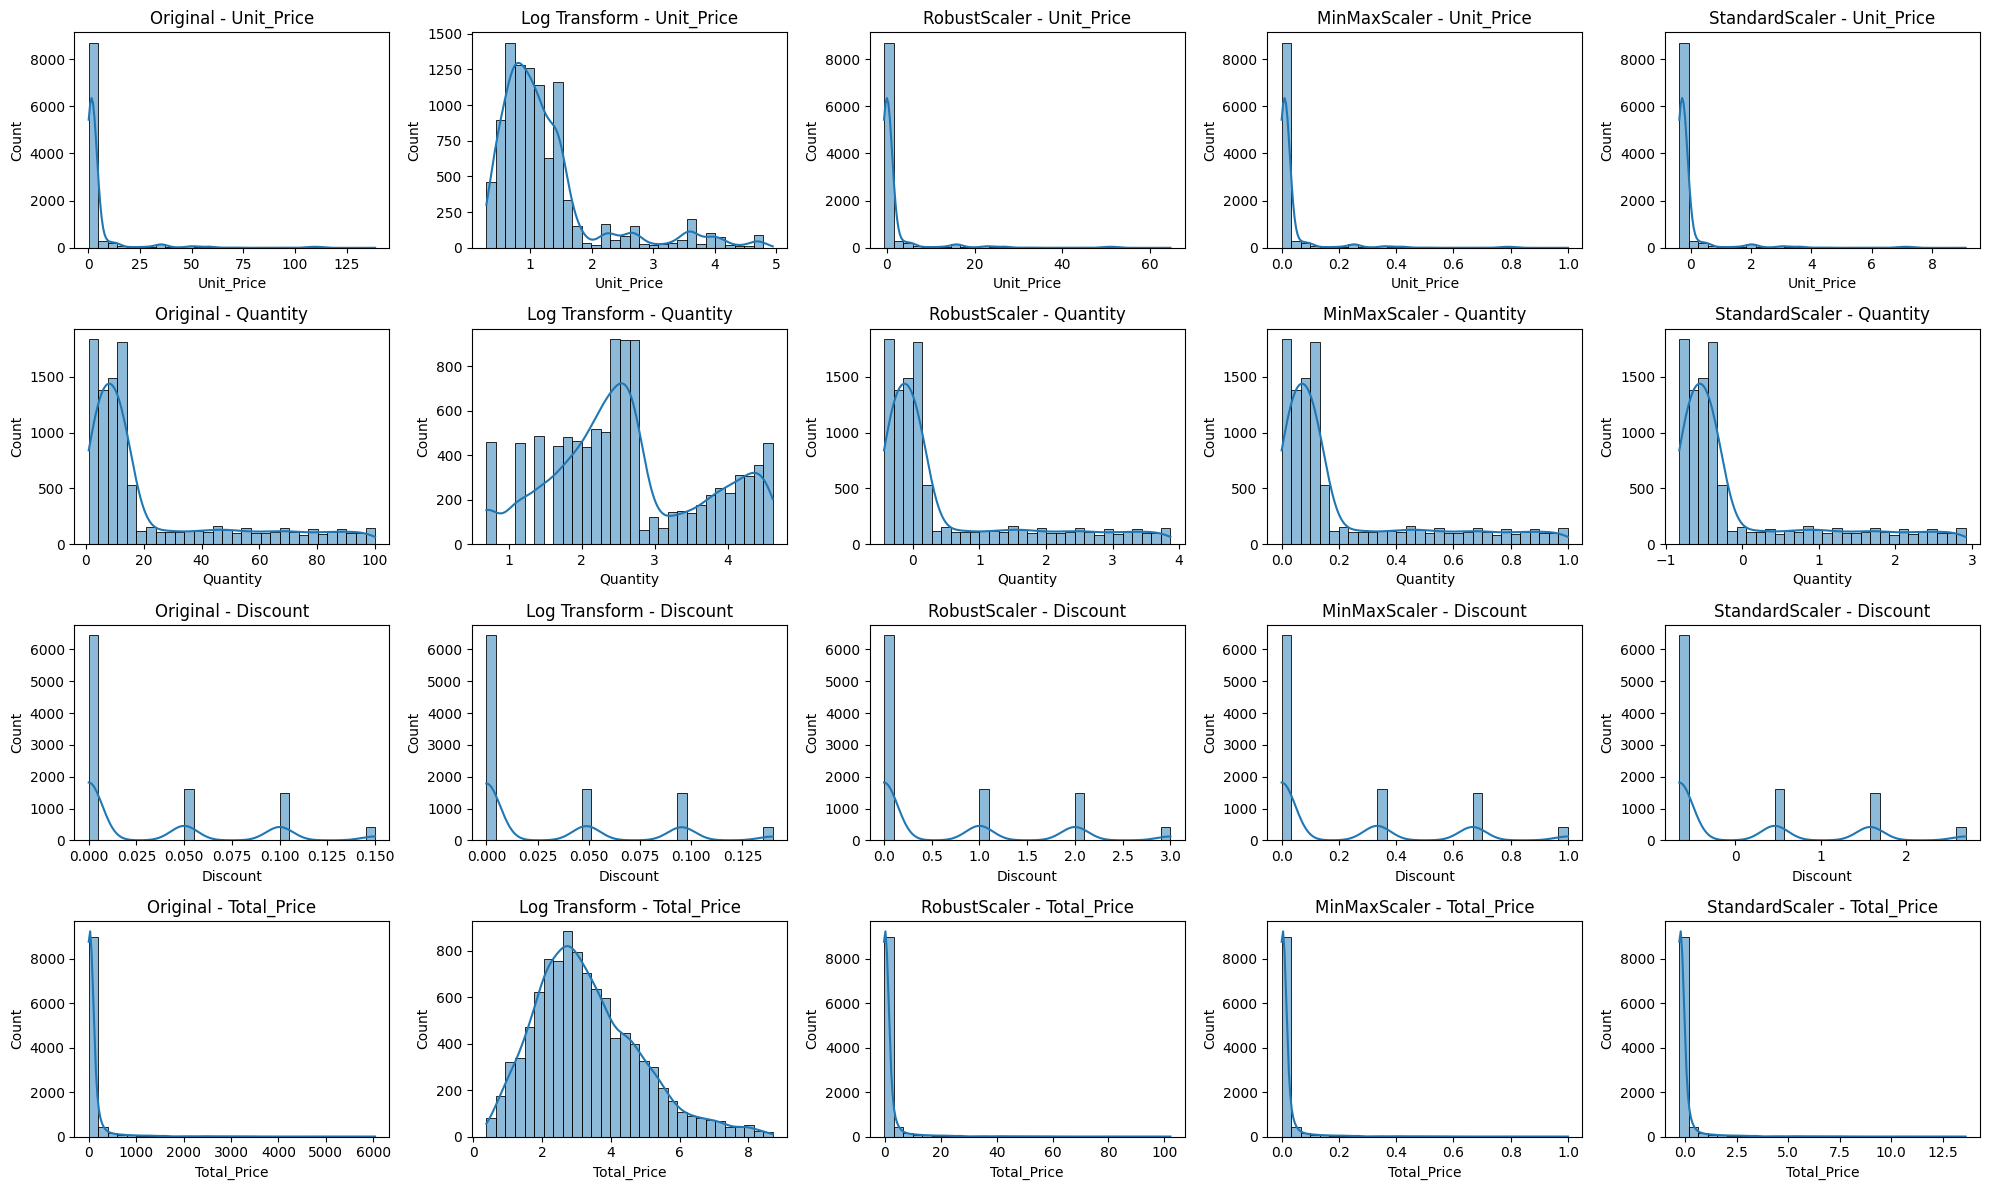

In [18]:
### Log Transform (np.log1p()) → Cocok untuk data dengan distribusi sangat skewed
df_log = df4.select_dtypes(include='object').copy()
df_log[number_cols] = df4[number_cols].apply(np.log1p)

### RobustScaler → Cocok untuk data dengan banyak outlier
df_rs = df4.copy()
df_rs[number_cols] = RobustScaler().fit_transform(df4[number_cols])

### MinMaxScaler → Jika ingin data berada dalam rentang [0,1]
df_mms = df4.select_dtypes(include='object').copy()
df_mms[number_cols] = MinMaxScaler().fit_transform(df4[number_cols])

### StandardScaler → Jika data akan digunakan dalam metode berbasis jarak (K-Means, PCA, dll.)
df_ss = df4.select_dtypes(include='object').copy()
df_ss[number_cols] = StandardScaler().fit_transform(df4[number_cols])

# List dataset hasil normalisasi
datasets = [df4, df_log, df_rs, df_mms, df_ss]
titles = ["Original", "Log Transform", "RobustScaler", "MinMaxScaler", "StandardScaler"]

# Buat subplots (4 baris untuk setiap variabel, 5 kolom untuk setiap metode)
fig, axes = plt.subplots(4, 5, figsize=(20, 12))

# Loop melalui setiap dataset dan setiap variabel
for i, (df, title) in enumerate(zip(datasets, titles)):
    for j, col in enumerate(number_cols):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[j, i])
        axes[j, i].set_title(f"{title} - {col}")

plt.tight_layout()
plt.show()

### 5.4.1. Periksa Scaling terbaik menggunakan Silhoutte Score dari KMeans
Kode Testing dapat Dimatikan karena komputasi butuh 31s (tidak akan mengganggu proses keseluruhan). Hasil output ada di akhir kode

In [12]:
datasets2 = {
    "df_log": df_log,  # Log Transform
    "df_rs": df_rs,  # RobustScaler
    "df_mms": df_mms,  # MinMaxScaler
    "df_ss": df_ss,  # StandardScaler
    "original": df4.select_dtypes(include=['int64', 'float64']) # Data Hasil Filter Outliers
}

scores_summary = {}

#--Start Comment
# Range K yang akan diuji (misalnya 2-3, akan diuji nanti menggunakan elbow method)
for name, df in datasets2.items():
    scores = []  # Simpan semua skor untuk setiap K dalam satu dataset
    for n_cluster in range(2, 4):
        score = silhouette_score(df[number_cols], 
                                 KMeans(n_clusters=n_cluster, random_state=42, n_init=10).fit_predict(df[number_cols]))
        scores.append(score)
        print(f"Silhouette Score untuk K={n_cluster} pada {name}: {score:.3f}")

    # Hitung rata-rata score untuk dataset saat ini
    avg_score = np.mean(scores)
    scores_summary[name] = avg_score

# Tampilkan hasil akhir
print("\n📊 Rata-rata Silhouette Score per Dataset:")
for dataset, avg_score in scores_summary.items():
    print(f"{dataset}: {avg_score:.3f}")
#--End Comment

### --- OUTPUT --- ###
# Original data (31s rendering)
# Silhouette Score untuk K=2 pada df_log: 0.498
# Silhouette Score untuk K=3 pada df_log: 0.472
# Silhouette Score untuk K=2 pada df_rs: 0.909
# Silhouette Score untuk K=3 pada df_rs: 0.864
# Silhouette Score untuk K=2 pada df_mms: 0.699
# Silhouette Score untuk K=3 pada df_mms: 0.658
# Silhouette Score untuk K=2 pada df_ss: 0.635
# Silhouette Score untuk K=3 pada df_ss: 0.663
# Silhouette Score untuk K=2 pada original: 0.953
# Silhouette Score untuk K=3 pada original: 0.931

# 📊 Rata-rata Silhouette Score per Dataset:
# df_log: 0.485
# df_rs: 0.887
# df_mms: 0.679
# df_ss: 0.649
# original: 0.942

Silhouette Score untuk K=2 pada df_log: 0.495
Silhouette Score untuk K=3 pada df_log: 0.474
Silhouette Score untuk K=2 pada df_rs: 0.899
Silhouette Score untuk K=3 pada df_rs: 0.865
Silhouette Score untuk K=2 pada df_mms: 0.698
Silhouette Score untuk K=3 pada df_mms: 0.656
Silhouette Score untuk K=2 pada df_ss: 0.633
Silhouette Score untuk K=3 pada df_ss: 0.663
Silhouette Score untuk K=2 pada original: 0.946
Silhouette Score untuk K=3 pada original: 0.904

📊 Rata-rata Silhouette Score per Dataset:
df_log: 0.484
df_rs: 0.882
df_mms: 0.677
df_ss: 0.648
original: 0.925


🌟 **Insight:** Score terbaik masih dipegang **df4** (After Outlier Handling, Before Scalling), Scalling tidak diperlukan

In [58]:
for name, df in datasets2.items(): # melihat perbandingan hasil nilai tiap metode scalling
    display(df.head(2))

,Unit_Price,Quantity,Discount,Total_Price
0,1.054312,4.317488,0.09531,4.832624
1,1.054312,2.944439,0.04879,3.495901


,Unit_Price,Quantity,Discount,Total_Price
0,0.056604,2.739130,2.0,1.763308
1,0.056604,0.304348,1.0,0.191697


,Unit_Price,Quantity,Discount,Total_Price
0,0.011128,0.737374,0.666667,0.020546
1,0.011128,0.171717,0.333333,0.005218


,Unit_Price,Quantity,Discount,Total_Price
0,-0.265163,1.935430,1.580190,-0.000341
1,-0.265163,-0.178408,0.460763,-0.213539


,Product,Unit_Price,Quantity,Discount,Total_Price
0,15,1.87,74,0.10,124.54
1,11,1.87,18,0.05,31.98


In [22]:
# Kita akan menggunakan df4 original karena memiliki score tertinggi
df4.head()

,Product,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,...,Region_Hessen,Region_Mecklenburg-Vorpommern,Region_Niedersachsen,Region_Nordrhein-Westfalen,Region_Rheinland-Pfalz,Region_Saarland,Region_Sachsen,Region_Sachsen-Anhalt,Region_Schleswig-Holstein,Region_Thüringen
0,15,1.87,74,0.10,124.54,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,11,1.87,18,0.05,31.98,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,22,12.04,71,0.15,726.61,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,26,64.91,91,0.10,5316.13,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,1.64,4,0.00,6.56,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False


# **6. Pembangunan Model Clustering** (using df4)
Menggunakan df4 (Outlier handling [Trimming], dengan Encoding, Tanpa Scaling)
## 6.a. Membangun Model Clustering
Build & Evaluate All Possible Model Type (K-Means & Agglomerative) & N_Cluster (2-6)
- Pilih algoritma clustering yang sesuai.
- Latih model dengan data menggunakan algoritma tersebut.
- Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
- Hitung Silhouette Score sebagai ukuran kualitas cluster.


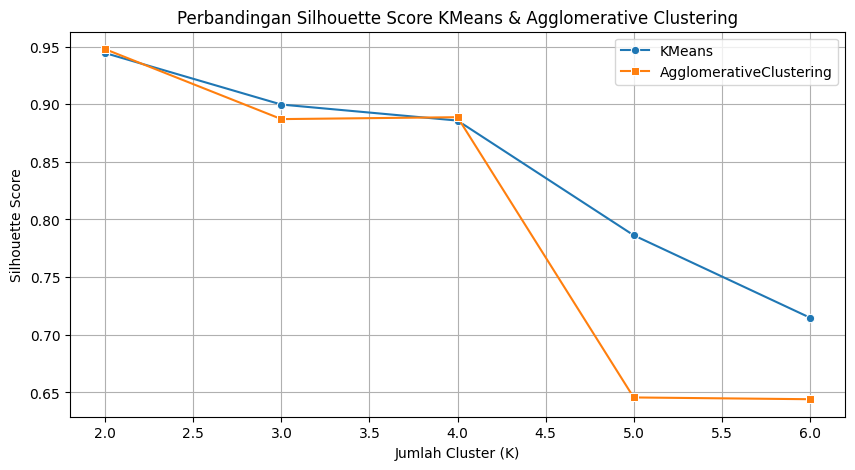

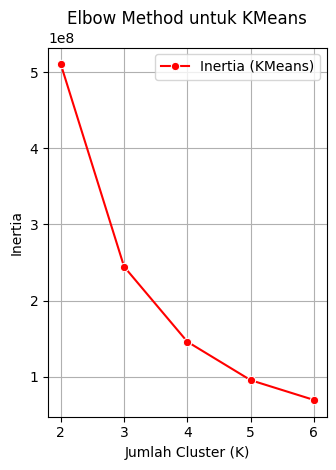

In [23]:
# Kode dapat dimatikan, tidak mengganggu proses keseluran [43s rendering], hasil visualisasi ada di akhir
#--Start Comment
# Inisialisasi dictionary untuk menyimpan hasil
silhouette_scores = {
    "KMeans": [],
    "Agglomerative": []
}

inertia_values = []  # Untuk menyimpan inertia (Elbow Method)
cluster_range = range(2, 7)  # Mulai dari 2 hingga 6 cluster (karena 1 cluster tidak memiliki silhouette score)

# BUILD: Loop untuk jumlah cluster 2 sampai 6 
for k in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(df4)
    kmeans_score = silhouette_score(df4, kmeans_labels)
    silhouette_scores["KMeans"].append(kmeans_score)
    inertia_values.append(kmeans.inertia_)  # Simpan inertia untuk Elbow Method

    # AgglomerativeClustering
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo.fit_predict(df4)
    agglo_score = silhouette_score(df4, agglo_labels)
    silhouette_scores["Agglomerative"].append(agglo_score)

# EVALUATE: Visualisasi hasil dengan plot garis
plt.figure(figsize=(10, 5))
sns.lineplot(x=list(cluster_range), y=silhouette_scores["KMeans"], marker="o", label="KMeans")
sns.lineplot(x=list(cluster_range), y=silhouette_scores["Agglomerative"], marker="s", label="AgglomerativeClustering")

plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score KMeans & Agglomerative Clustering")
plt.legend()
plt.grid(True)
plt.show()

# EVALUEATE: Visualisasi Elbow Method
plt.subplot(1, 2, 2)
sns.lineplot(x=list(cluster_range), y=inertia_values, marker="o", color="r", label="Inertia (KMeans)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk KMeans")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
#--End Comment

 **Insight:** 
- 🌟 Optimum KMeans, n_cluster = 2. Elbow method tidak punya patahan yang kuat di range 2-6.
- 🌟 kita akan menggunakan n_cluster = 4 karena itu maksimum cluster dengan score tertinggi sebelum drop 

## 6.b. Evaluasi 1st Model Clustering

Ini adalah KMeans dan Agglomerative versi 1 (sebelum Hyperparameter Tuning & Feature Selection)

In [24]:
kmeans_score = silhouette_score(df4, KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(df4))
print(f"Silhouette Score untuk K=5 KMeans: {kmeans_score:.5f}") # 0.88546

agglo_score = silhouette_score(df4, AgglomerativeClustering(n_clusters=4).fit_predict(df4))
print(f"Silhouette Score untuk K=5 Agglomerative: {agglo_score:.5f}") # 0.88838

Silhouette Score untuk K=5 KMeans: 0.88578
Silhouette Score untuk K=5 Agglomerative: 0.88870


🌟 **Insight:** Agglomerative Clustering adalah algoritma yang paling tinggi. Namun kita masih akan melihat hasil nya nanti setelah feature selection dan tampilan distribusi nya

## 6.c. Feature Selection (Opsional)
Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Kita akan membantingkan fitur yang dipilih oleh 2 algoritma (K-Means & Agglomerative Clustering) dan mengambil 6 fitur paling utama

### 6.c.1. K-Means

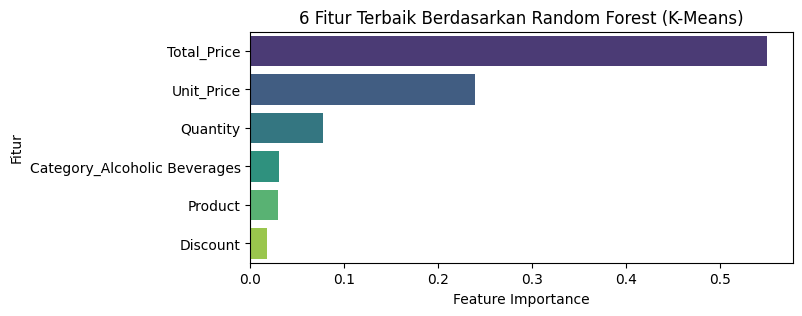

In [46]:
df_final_kmean = df4.copy()

df_final_kmean['cluster'] = KMeans( n_clusters=5, init="k-means++", n_init=10, algorithm="lloyd", max_iter=300, tol=0.0001, random_state=42).fit_predict(df4)

# Pisahkan fitur (X) dan cluster (y) - pastikan cluster ada di dataset
X = df_final_kmean.drop(columns=["cluster"])  # Ganti 'cluster' dengan nama kolom yang benar
y = df_final_kmean["cluster"]  # Ganti 'cluster' dengan nama kolom yang benar

# Gunakan Random Forest untuk Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Ambil Feature Importance
feature_importance = rf.feature_importances_

# Buat DataFrame untuk menyimpan hasil
feat_imp_df = pd.DataFrame({
    "Fitur": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Ambil 6 fitur terbaik
top_6_features_kmean = feat_imp_df.head(6)

# Visualisasi hasil
plt.figure(figsize=(7, 3))
sns.barplot(x=top_6_features_kmean["Importance"], y=top_6_features_kmean["Fitur"], palette="viridis", hue=top_6_features_kmean["Fitur"])
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.title("6 Fitur Terbaik Berdasarkan Random Forest (K-Means)")
plt.show()

### 6.c.2. Agglomerative Clustering

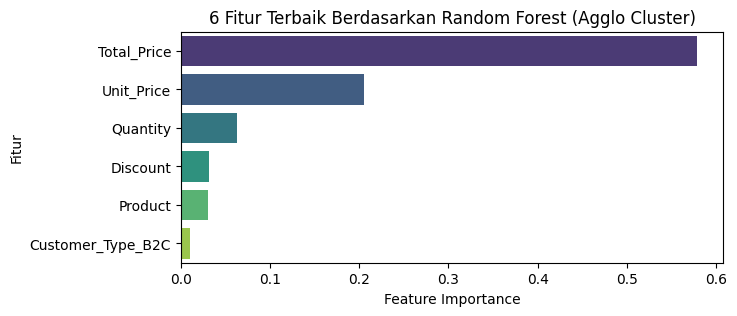

In [45]:
df_final_agglo = df4.copy()
df_final_agglo['cluster'] = AgglomerativeClustering(n_clusters=5, linkage="single", metric="euclidean").fit_predict(df4)

# 🔹 Pisahkan fitur (X) dan cluster (y) - pastikan cluster ada di dataset
X = df_final_agglo.drop(columns=["cluster"])  # Ganti 'cluster' dengan nama kolom yang benar
y = df_final_agglo["cluster"]  # Ganti 'cluster' dengan nama kolom yang benar

# 🔹 Gunakan Random Forest untuk Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 🔹 Ambil Feature Importance
feature_importance = rf.feature_importances_

# 🔹 Buat DataFrame untuk menyimpan hasil
feat_imp_df = pd.DataFrame({
    "Fitur": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Ambil 6 fitur terbaik
top_6_features_agglo = feat_imp_df.head(6)

# Visualisasi hasil
plt.figure(figsize=(7, 3))
sns.barplot(x=top_6_features_agglo["Importance"], y=top_6_features_agglo["Fitur"], palette="viridis", hue=top_6_features_agglo["Fitur"])
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.title("6 Fitur Terbaik Berdasarkan Random Forest (Agglo Cluster)")
plt.show()

In [ ]:
# Lihat apakah kolom Customer_Type ada lebih dari 2 kolom
print([col for col in df4.columns if col.startswith("Customer_Type")]) #  ['Customer_Type_B2B', 'Customer_Type_B2C']
print([col for col in df4.columns if col.startswith("Category")]) #  ['Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']

['Customer_Type_B2B', 'Customer_Type_B2C']
['Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']


In [82]:
# dataframe setelah fature selection
df_final_kmean2 = df_final_kmean[list(top_6_features_kmean['Fitur']) + ['Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']].copy()
df_final_agglo2 = df_final_agglo[list(top_6_features_agglo['Fitur']) + ['Customer_Type_B2B']].copy()
display(df_final_kmean2.head())
df_final_agglo2.head()

,Total_Price,Unit_Price,Quantity,Category_Alcoholic Beverages,Product,Discount,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,124.54,1.87,74,False,15,0.10,False,True,False,False
1,31.98,1.87,18,False,11,0.05,False,False,True,False
2,726.61,12.04,71,True,22,0.15,True,False,False,False
3,5316.13,64.91,91,True,26,0.10,True,False,False,False
4,6.56,1.64,4,False,13,0.00,False,True,False,False


,Total_Price,Unit_Price,Quantity,Discount,Product,Customer_Type_B2C,Customer_Type_B2B
0,124.54,1.87,74,0.10,15,False,True
1,31.98,1.87,18,0.05,11,False,True
2,726.61,12.04,71,0.15,22,False,True
3,5316.13,64.91,91,0.10,26,False,True
4,6.56,1.64,4,0.00,13,True,False


### Evaluasi 2nd Model Cluster (After Feature Select + Hyperparameter Tuning)

In [85]:
df_final_kmean3 = df_final_kmean2.copy() # agar test silhoute menguji df yang tanpa cluster (df_final_kmean2)
df_final_kmean3['Cluster'] = KMeans(n_clusters=4, init="k-means++", n_init=10, algorithm="lloyd", max_iter=300, tol=0.0001, random_state=42).fit_predict(df_final_kmean2)

df_final_agglo3 = df_final_agglo2.copy() # dipisah agar test silhoutte menguji df yang tanpa kolom cluster (df_final_agglo2)
df_final_agglo3['Cluster'] = AgglomerativeClustering(n_clusters=4, linkage="single", metric="euclidean").fit_predict(df_final_agglo2)

# Tampilkan Score
kmean_score = silhouette_score(df_final_kmean2, df_final_kmean3['Cluster'])
print(f"Silhouette Score untuk K=5 KMean (6 selected features [1 one hot] + Hyperparameter Tuning): {kmean_score:.5f}") # 0.88582
agglo_score = silhouette_score(df_final_agglo2, df_final_agglo3['Cluster'])
print(f"Silhouette Score untuk K=5 Agglomerative (6 selected features [1 one hot] + Hyperparameter Tuning): {agglo_score:.5f}") # 0.94913

Silhouette Score untuk K=5 KMean (6 selected features [1 one hot] + Hyperparameter Tuning): 0.88582
Silhouette Score untuk K=5 Agglomerative (6 selected features [1 one hot] + Hyperparameter Tuning): 0.94913


Didapati Cluster dengan Silhoutte Score tertinggi adalah **Agglomerative (Hyperparameter Tuning + 6 Features) [df_final_agglo3]**
| Model                                              | Silhouette Score | Kondisi                                   |
|----------------------------------------------------|------------------|-------------------------------------------|
| KMeans                                             | 0.88546          | K=5                                      |
| Agglomerative                                      | 0.88838          | K=5                                      |
| KMeans (6 Features + Hyperparameter Tuning)        | 0.88550          | K=5,6 Fitur Terpilih, Tuning             |
| Agglomerative (6 Features + Hyperparameter Tuning) | **[0.96392]**    | K=5,6 Fitur Terpilih, Tuning             |

## 6.d. Visualisasi Hasil Cluster

In [86]:
display(df_final_kmean3.head(3))
display(df_final_agglo3.head(3))

,Total_Price,Unit_Price,Quantity,Category_Alcoholic Beverages,Product,Discount,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water,Cluster
0,124.54,1.87,74,False,15,0.10,False,True,False,False,0
1,31.98,1.87,18,False,11,0.05,False,False,True,False,0
2,726.61,12.04,71,True,22,0.15,True,False,False,False,2


,Total_Price,Unit_Price,Quantity,Discount,Product,Customer_Type_B2C,Customer_Type_B2B,Cluster
0,124.54,1.87,74,0.10,15,False,True,0
1,31.98,1.87,18,0.05,11,False,True,0
2,726.61,12.04,71,0.15,22,False,True,0


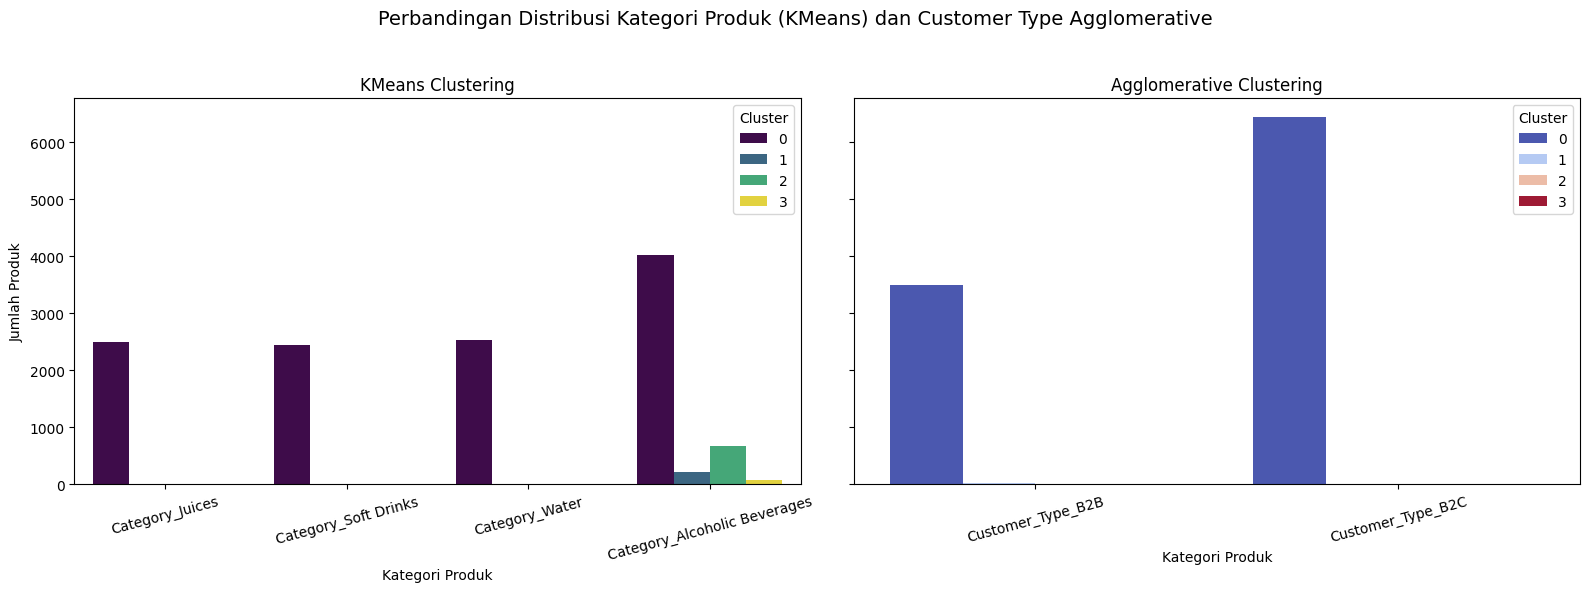

In [88]:
# Daftar kategori
categories = ['Category_Juices', 'Category_Soft Drinks', 'Category_Water', 'Category_Alcoholic Beverages']
customerType = ['Customer_Type_B2B', 'Customer_Type_B2C']

# Fungsi bantu untuk ubah ke long-form
def prepare_long_df_category(df, cluster_col='Cluster'):
    df_long = df.melt(id_vars=cluster_col, value_vars=categories,
                      var_name='Category', value_name='Value')
    return df_long[df_long['Value'] == 1]
def prepare_long_df_customerType(df, cluster_col='Cluster'):
    df_long = df.melt(id_vars=cluster_col, value_vars=customerType,
                      var_name='Category', value_name='Value')
    return df_long[df_long['Value'] == 1]

# Long format untuk KMeans dan Agglomerative
df_long_kmeans = prepare_long_df_category(df_final_kmean3, cluster_col='Cluster')
df_long_agglo = prepare_long_df_customerType(df_final_agglo3, cluster_col='Cluster')

# Plot perbandingan dalam 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot untuk KMeans
sns.countplot(data=df_long_kmeans, x='Category', hue='Cluster', palette='viridis', ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Kategori Produk')
axes[0].set_ylabel('Jumlah Produk')
axes[0].tick_params(axis='x', rotation=15)

# Plot untuk Agglomerative
sns.countplot(data=df_long_agglo, x='Category', hue='Cluster', palette='coolwarm', ax=axes[1])
axes[1].set_title('Agglomerative Clustering')
axes[1].set_xlabel('Kategori Produk')
axes[1].tick_params(axis='x', rotation=15)

# Layout
plt.suptitle("Perbandingan Distribusi Kategori Produk (KMeans) dan Customer Type Agglomerative", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

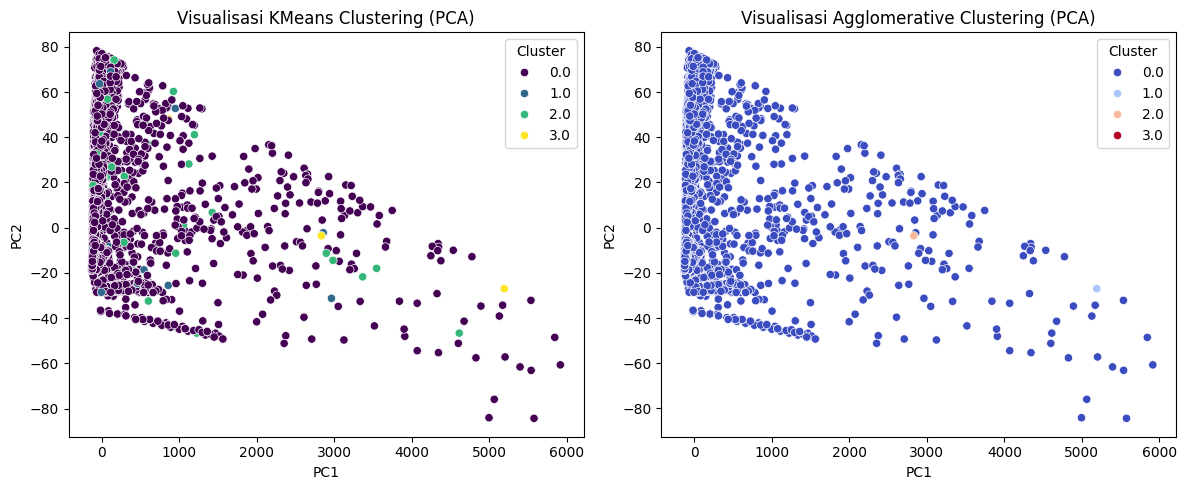

In [94]:
pca = PCA(n_components=2)

# PCA untuk KMeans
pca_result_kmeans = pca.fit_transform(df_final_kmean2)
df_pca_kmeans = pd.DataFrame(pca_result_kmeans, columns=["PC1", "PC2"])
df_pca_kmeans["Cluster"] = df_final_kmean3["Cluster"]

# PCA untuk Agglomerative
pca_result_agglo = pca.fit_transform(df_final_agglo2)
df_pca_agglo = pd.DataFrame(pca_result_agglo, columns=["PC1", "PC2"])
df_pca_agglo["Cluster"] = df_final_agglo3["Cluster"]

# Visualisasi Hasil Clustering
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KMeans scatter plot
sns.scatterplot(data=df_pca_kmeans, x="PC1", y="PC2", hue="Cluster", palette="viridis", ax=axes[0])
axes[0].set_title("Visualisasi KMeans Clustering (PCA)")

# Agglomerative scatter plot
sns.scatterplot(data=df_pca_agglo, x="PC1", y="PC2", hue="Cluster", palette="coolwarm", ax=axes[1])
axes[1].set_title("Visualisasi Agglomerative Clustering (PCA)")

plt.tight_layout()
plt.show()

🌟 Kita menggunakan 2rd Model KMeans. Karena KMeans memiliki cluster lebih terdistribusi daripada Agglomerative

In [60]:
df_final_kmean3.head() # Dataset Final Clustering

,Total_Price,Unit_Price,Quantity,Category_Alcoholic Beverages,Product,Discount,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water,Cluster
0,124.54,1.87,74,False,15,0.10,False,True,False,False,0
1,31.98,1.87,18,False,11,0.05,False,False,True,False,0
2,726.61,12.04,71,True,22,0.15,True,False,False,False,2
3,5316.13,64.91,91,True,26,0.10,True,False,False,False,3
4,6.56,1.64,4,False,13,0.00,False,True,False,False,0


## 6.e. Analisis dan Interpretasi Hasil Cluster

### 6.e.1. Interpretasi Target (Label dikembalikan ke nilai awal)

In [61]:
### Interpretasi Target (Product & Category) ###

df_final_normal = df_final_kmean3.copy()

# menggunakan nilai original dari `df`
[col for col in df_final_kmean3.columns if col.startswith("Category")]

# Transformasi dari one-hot encoding ke satu kolom kategori
# Cari semua kolom kategori (yang diawali dengan "Category_")
category_columns = [col for col in df4.columns if col.startswith("Category_")]

# Buat kolom "Category" baru berdasarkan kolom one-hot encoding
df_final_normal["Category"] = df4[category_columns].idxmax(axis=1).str.replace("Category_", "")

# Lakukan inverse transform ke kolom "Product"
df_final_normal["Product"] = label_encoder.inverse_transform(df_final_kmean3["Product"])

# Hapus kolom one-hot jika tidak diperlukan
df_final_normal.drop(columns=[col for col in df_final_kmean3.columns if col.startswith("Category")], inplace=True)


### Inverse Data Tidak dilakukan karena data numerik sudah original ###

# Tampilkan hasil
df_final_normal.head(20)

,Total_Price,Unit_Price,Quantity,Product,Discount,Cluster,Category
0,124.54,1.87,74,Hohes C Orange,0.10,0,Juices
1,31.98,1.87,18,Fritz-Kola,0.05,0,Soft Drinks
2,726.61,12.04,71,Merlot,0.15,2,Alcoholic Beverages
3,5316.13,64.91,91,Moët & Chandon,0.10,3,Alcoholic Beverages
4,6.56,1.64,4,Granini Apple,0.00,0,Juices
5,384.88,8.62,47,Riesling,0.05,0,Alcoholic Beverages
6,8.70,1.74,5,Pepsi,0.00,0,Soft Drinks
7,27.00,1.80,15,Hohes C Orange,0.00,0,Juices
8,1550.29,30.22,57,Havana Club,0.10,2,Alcoholic Beverages
9,5.59,0.98,6,Vio Wasser,0.05,0,Water


# **Analisis Hasil Clustering**

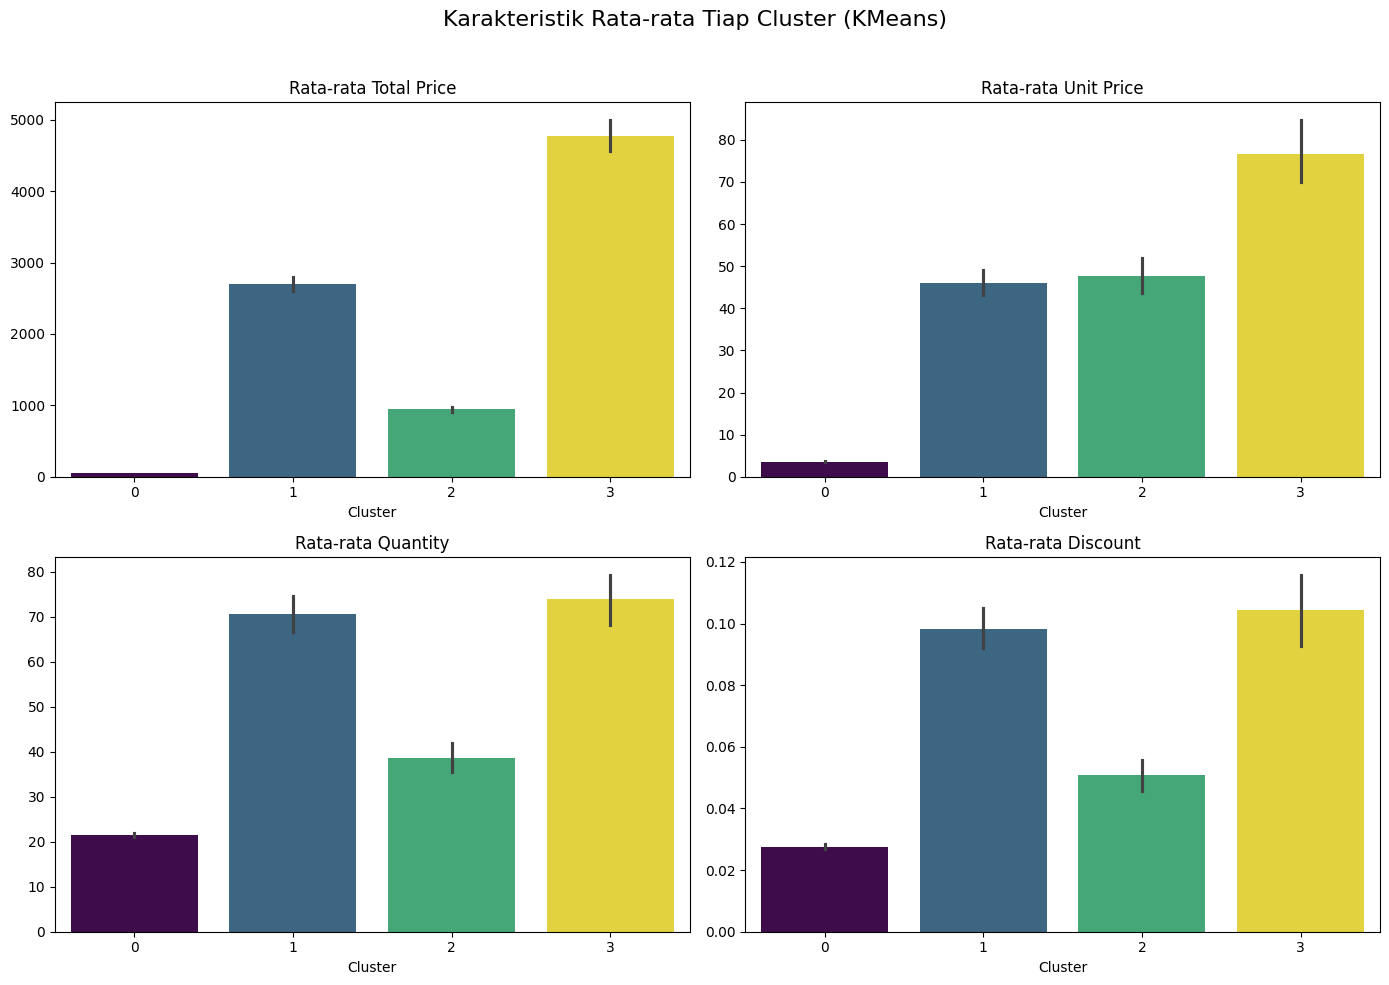

In [95]:
import seaborn as sns

# Buat bar plot untuk setiap fitur numerik per cluster
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['Total_Price', 'Unit_Price', 'Quantity', 'Discount']
titles = ['Rata-rata Total Price', 'Rata-rata Unit Price', 'Rata-rata Quantity', 'Rata-rata Discount']

for i, ax in enumerate(axes.flat):
    sns.barplot(x='Cluster', y=features[i], data=df_final_normal, ax=ax, palette='viridis', hue="Cluster", legend=False)
    ax.set_title(titles[i])
    ax.set_xlabel(f"Cluster")
    ax.set_ylabel("")

plt.suptitle("Karakteristik Rata-rata Tiap Cluster (KMeans)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Cluster 0:
- Rata-rata Total Price: 49.56
- Rata-rata Unit Price: 3.54
- Rata-rata Quantity: 21.43
- Rata-rata Discount: 0.03
- Jumlah Produk: 9,499
- Analisis: Cluster ini mencerminkan transaksi dengan volume dan harga satuan yang rendah. Produk dalam cluster ini kemungkinan besar berasal dari kategori minuman ringan atau jus yang terjangkau. Ini adalah kelompok utama dari transaksi harian yang umum dan rutin.

## Cluster 1:
- Rata-rata Total Price: 2,695.56
- Rata-rata Unit Price: 46.08
- Rata-rata Quantity: 70.67
- Rata-rata Discount: 0.10
- Jumlah Produk: 107
- Analisis: Cluster ini terdiri dari transaksi dalam jumlah besar dan harga satuan menengah ke atas. Diskon juga relatif tinggi. Ini kemungkinan besar mencerminkan pembelian dalam jumlah besar untuk produk kategori premium dengan volume besar—mungkin pembelian grosir atau bisnis.

## Cluster 2:
- Rata-rata Total Price: 942.55
- Rata-rata Unit Price: 47.65
- Rata-rata Quantity: 38.68
- Rata-rata Discount: 0.05
- Jumlah Produk: 337
- Analisis: Cluster ini menunjukkan transaksi dengan harga satuan tinggi namun dengan jumlah yang lebih sedikit dibanding Cluster 1. Bisa jadi ini transaksi produk eksklusif dengan pembelian individual atau lebih selektif.

## Cluster 3:
- Rata-rata Total Price: 4,778.80
- Rata-rata Unit Price: 76.68
- Rata-rata Quantity: 73.83
- Rata-rata Discount: 0.10
- Jumlah Produk: 35
- Analisis: Cluster ini merupakan kelompok transaksi bernilai tinggi, baik dari sisi harga satuan maupun jumlah. Bisa dikatakan ini adalah kategori pelanggan atau transaksi premium atau eksklusif, dengan diskon yang signifikan. Produk dalam cluster ini sangat mungkin berasal dari kategori minuman beralkohol premium seperti champagne atau wine mewah.

# **7. Mengeksport Data**
10k Rows, 5 Cluster, 6 Features (4 Numeric + 2 Category)

In [97]:
df_final_normal.to_csv('beverage_labeled.csv', index=False)